In [2]:
library("animation")
library("dplyr")
library("ggplot2")
library("gstat")
library("maps")
library("STRbook")


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [3]:
set.seed(1)

In [4]:
data("NOAA_df_1990", package = "STRbook")
Tmax <- filter(
    NOAA_df_1990,
    # subset the data
    proc == "Tmax" &
        # only max temperature
        month %in% 5:9 &
        # May to September
        year == 1993
)
# year of 1993

In [5]:
Tmax %>% select(lon, lat, date, julian, z) %>% head()

,lon,lat,date,julian,z
,<dbl>,<dbl>,<date>,<int>,<dbl>
1,-81.43333,39.35,1993-05-01,728050,82
2,-81.43333,39.35,1993-05-02,728051,84
3,-81.43333,39.35,1993-05-03,728052,79
4,-81.43333,39.35,1993-05-04,728053,72
5,-81.43333,39.35,1993-05-05,728054,73
6,-81.43333,39.35,1993-05-06,728055,78


In [6]:
Tmax$t <- Tmax$julian - 728049

In [7]:
Tmax_1 <- subset(Tmax, t %in% c(1, 15, 30))

In [8]:
NOAA_plot <- ggplot(Tmax_1) +
    # plot points
    geom_point(
        aes(
            x = lon, y = lat,
            # lon and lat
            colour = z
        ),
        # attribute color
        size = 2
    ) +
    # make all points larger
    col_scale(name = "degF") +
    # attach color scale
    xlab("Longitude (deg)") +
    # x-axis label
    ylab("Latitude (deg)") +
    # y-axis label
    geom_path(
        data = map_data("state"),
        # add US states map
        aes(x = long, y = lat, group = group)
    ) +
    facet_grid(~date) +
    # facet by time
    coord_fixed(
        xlim = c(-105, -75),
        ylim = c(25, 50)
    ) +
    # zoom in
    theme_bw()


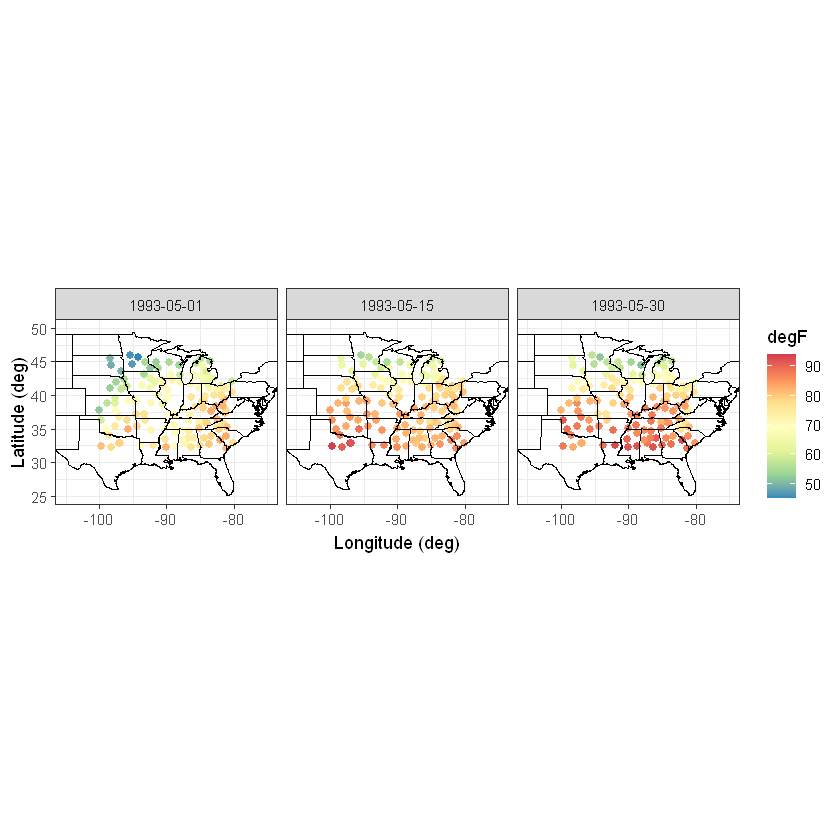

In [9]:
NOAA_plot

In [11]:
data("BEA", package = "STRbook")
head(BEA %>% select(-Description), 3)


,NAME10,X1970,X1980,X1990
,<fct>,<int>,<int>,<int>
6,"Adair, MO",2723,7399,12755
9,"Andrew, MO",3577,7937,15059
12,"Atchison, MO",3770,5743,14748


In [12]:
data("MOcounties", package = "STRbook")
head(MOcounties %>% select(long, lat, NAME10), 3)

,long,lat,NAME10
,<dbl>,<dbl>,<fct>
1,627911.9,4473554,"Clark, MO"
2,627921.4,4473559,"Clark, MO"
3,627923.0,4473560,"Clark, MO"


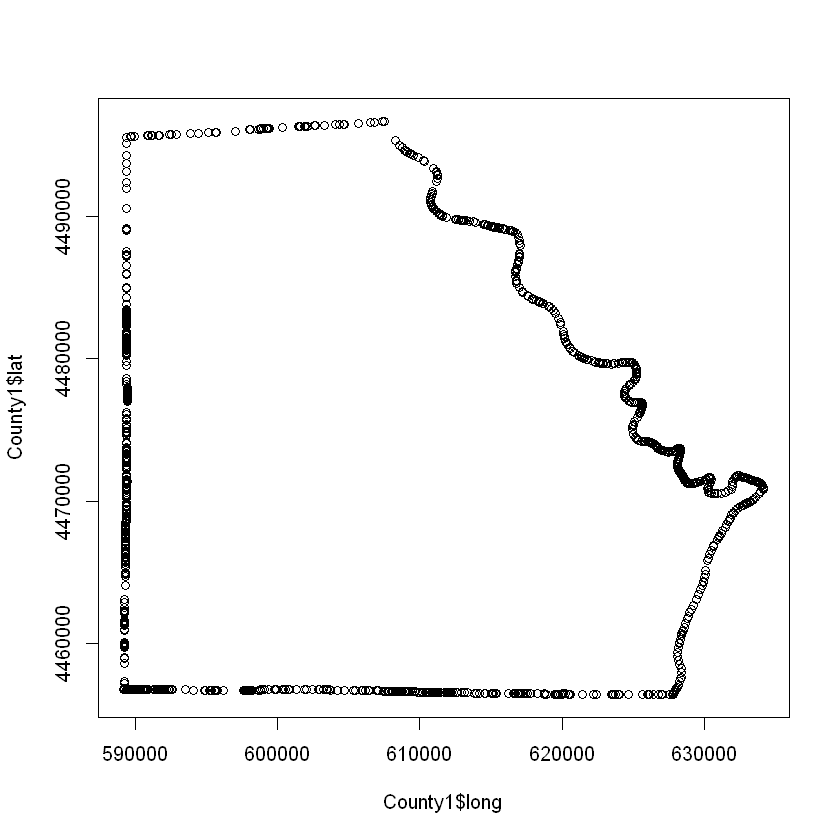

In [13]:

County1 <- filter(MOcounties, NAME10 == "Clark, MO")
plot(County1$long, County1$lat)

In [14]:
MOcounties <- left_join(MOcounties, BEA, by = "NAME10")

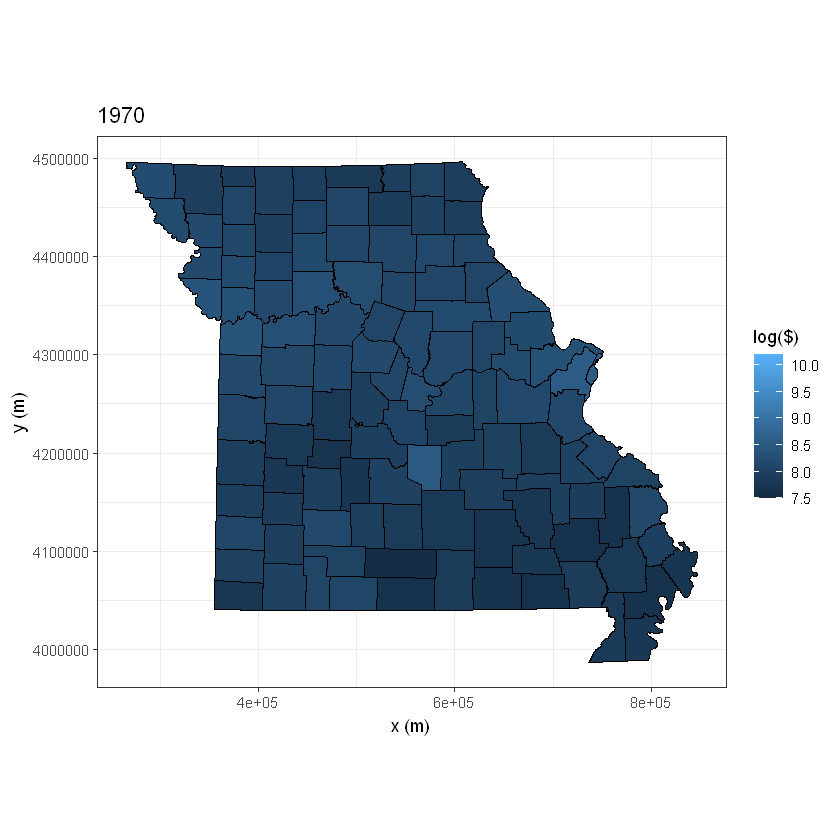

In [16]:
library(ggplot2)

g1 <- ggplot(MOcounties) +
  geom_polygon(aes(x = long, y = lat,
                   group = NAME10,
                   fill = log(X1970))) +  # log of income
  geom_path(aes(x = long, y = lat,
                 group = NAME10)) +  # county boundary
  scale_fill_gradient(limits = c(7.5, 10.2),  # corrected fill scale function
                      name = "log($)") +
  coord_fixed() +
  ggtitle("1970") +  # annotations
  xlab("x (m)") +
  ylab("y (m)") +
  theme_bw()

print(g1)  # Don't forget to print the plot!


In [17]:
UIDs <- unique(Tmax$id)
# extract IDs
UIDs_sub <- sample(UIDs, 10)
# sample 10 IDs
Tmax_sub <- filter(Tmax, id %in% UIDs_sub)

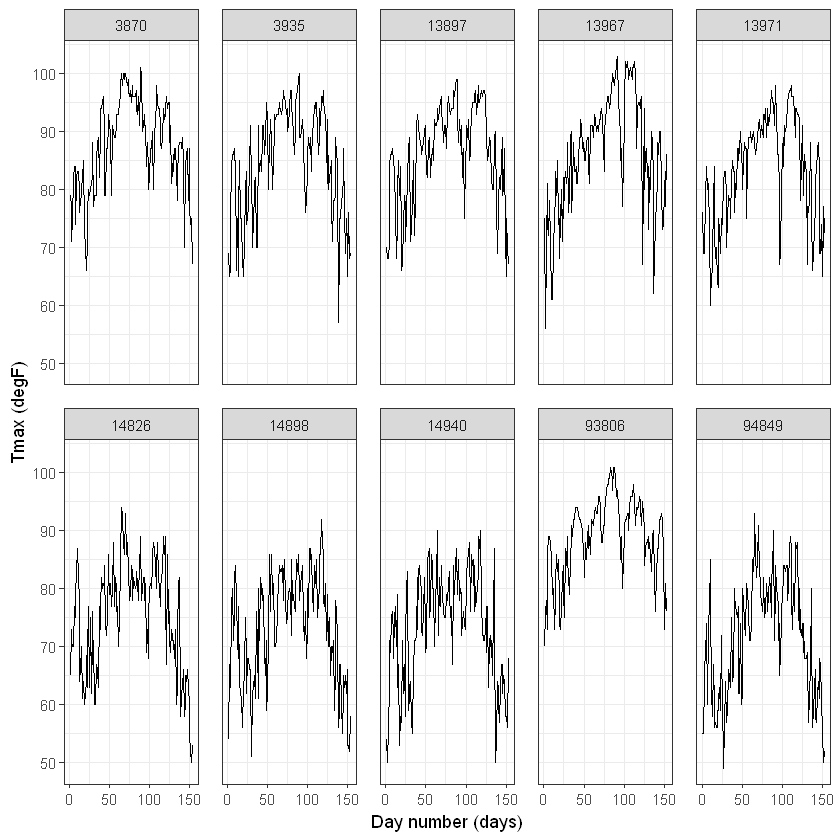

In [19]:
TmaxTS <- ggplot(Tmax_sub) +
geom_line(aes(x = t, y = z)) + # line plot of z against t
facet_wrap(~id, ncol = 5) +
# facet by station
xlab("Day number (days)") +
# x label
ylab("Tmax (degF)") +
# y label
theme_bw() +
# BW theme
theme(panel.spacing = unit(1, "lines"))
TmaxTS

In [20]:
lim_lat <- range(Tmax$lat)
# latitude range
lim_t <- range(Tmax$t)
# time range
lat_axis <- seq(lim_lat[1],
# latitude axis
lim_lat[2],
length=25)
t_axis <- seq(lim_t[1],
# time axis
lim_t[2],
length=100)
lat_t_grid <- expand.grid(lat = lat_axis,
t = t_axis)

In [21]:
Tmax_grid <- Tmax
dists <- abs(outer(Tmax$lat, lat_axis, "-"))
Tmax_grid$lat <- lat_axis[apply(dists, 1, which.min)]

In [23]:
Tmax_lat_Hov <- group_by(Tmax_grid, lat, t) %>%
summarise(z = mean(z))
Tmax_lat_Hov

`summarise()` has grouped output by 'lat'. You can override using the `.groups`
argument.


lat,t,z
<dbl>,<dbl>,<dbl>
32.13334,1,77.6
32.13334,2,73.8
32.13334,3,78.0
32.13334,4,81.2
32.13334,5,83.4
32.13334,6,87.2
32.13334,7,88.0
32.13334,8,85.8
32.13334,9,84.2


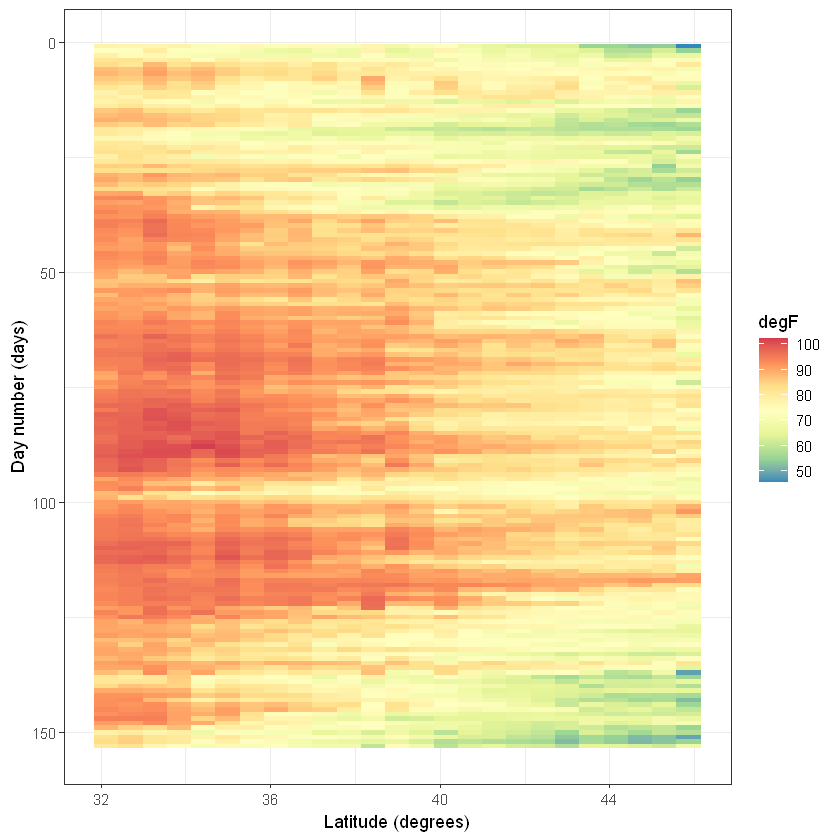

In [25]:
Hovmoller_lat <- ggplot(Tmax_lat_Hov) +
# take data
geom_tile(aes(x = lat, y = t, fill = z)) + # plot
fill_scale(name = "degF") +
# add color scale
scale_y_reverse() +
# rev y scale
ylab("Day number (days)") +
# add y label
xlab("Latitude (degrees)") +
# add x label
theme_bw()
Hovmoller_lat

In [27]:
library(ggplot2)
library(dplyr)  # Ensure you have dplyr loaded for filter()

Tmax_t <- function(tau) {
  Tmax_sub <- filter(Tmax, t == tau)  # Subset data
  
  ggplot(Tmax_sub) +
    geom_point(aes(x = lon, y = lat, colour = z), size = 4) +  # Plot points
    scale_color_gradient(limits = c(40, 110), name = "z") +  # Corrected color scale
    theme_bw()  # Black and white theme
}

# Example of how to call the function
# Tmax_t(1)  # Replace 1 with the desired value of tau


In [28]:
gen_anim <- function() {
for(t in lim_t[1]:lim_t[2]){
# for each time point
plot(Tmax_t(t))
# plot data at this time point
}
}
ani.options(interval = 0.2)
# 0.2s interval between frames
saveHTML(gen_anim(),
# run the main function
autoplay = FALSE,
# do not play on load
loop = FALSE,
# do not loop
verbose = FALSE,
# no verbose
outdir = ".",
# save to current dir
single.opts = "'controls': ['first', 'previous',
'play', 'next', 'last',
'loop', 'speed'],
'delayMin': 0",
htmlfile = "NOAA_anim.html")

Warning message in sprintf(js.temp, global.opts, img.name0, paste(shQuote(imglist, :
"one argument not used by format '(function($) {
    $(document).ready(function() {
	%s
	$('#%s').scianimator({
	    'images': [%s],
	    'width': %s,
	    'delay': %s,
	    'loopMode': '%s'%s
	});
    });
})(jQuery);'"
HTML file created at: NOAA_anim.html

